<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-task6/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0

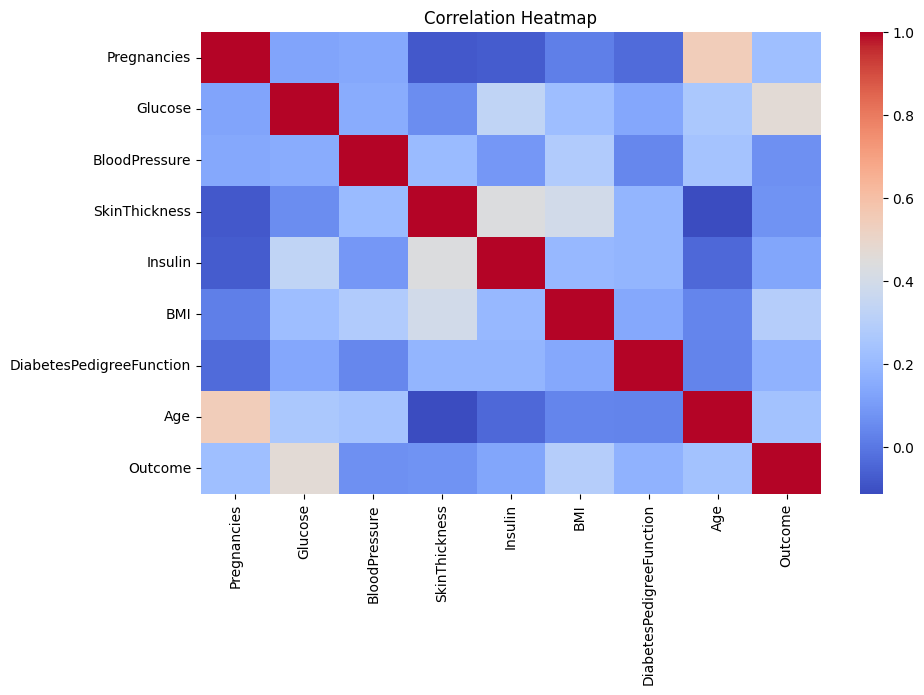

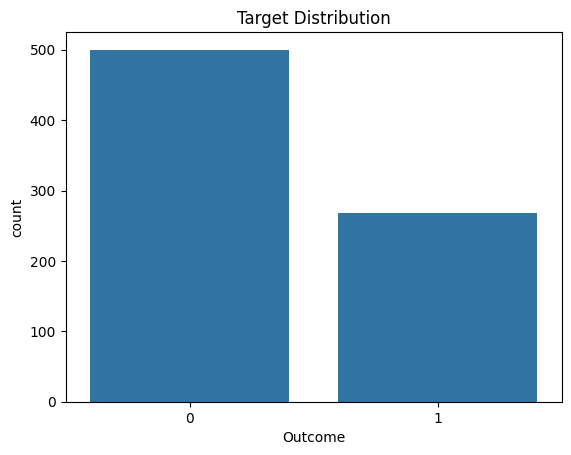

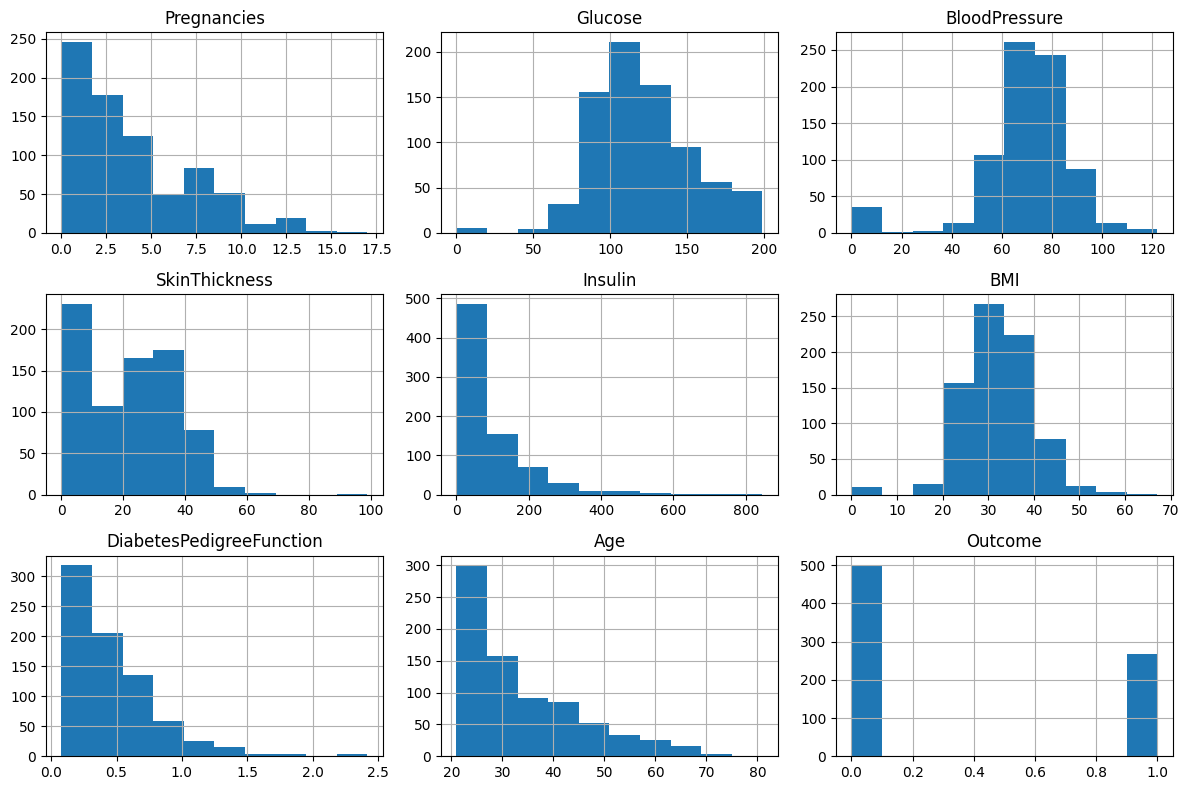


==== MEAN IMPUTATION ====
Best K: 8
Accuracy: 0.75
Confusion Matrix:
 [[109  16]
 [ 32  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       125
           1       0.69      0.52      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



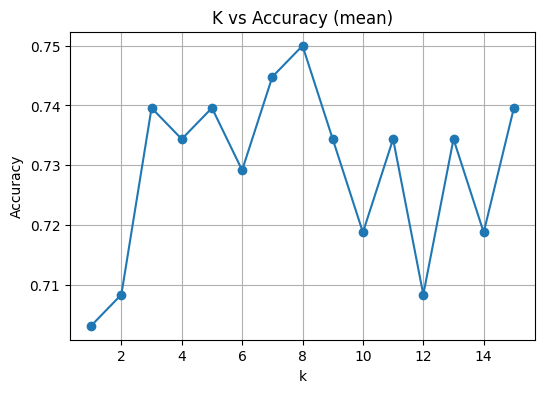

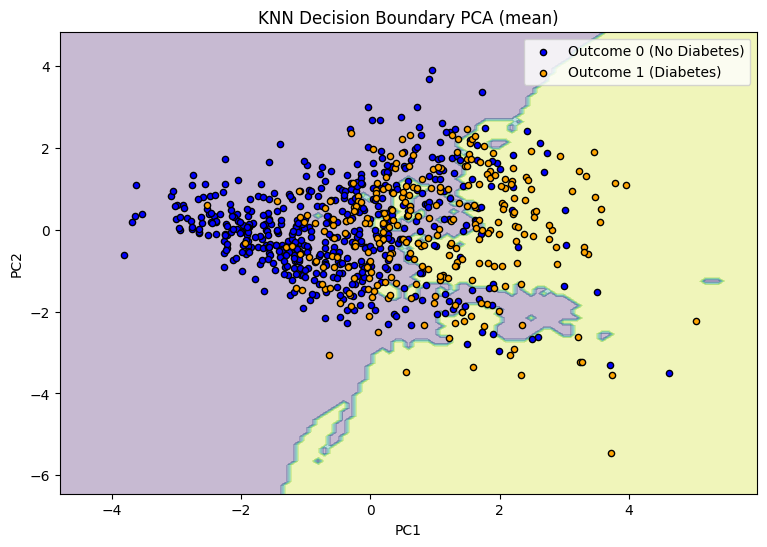


==== MEDIAN IMPUTATION ====
Best K: 5
Accuracy: 0.7447916666666666
Confusion Matrix:
 [[105  20]
 [ 29  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.66      0.57      0.61        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



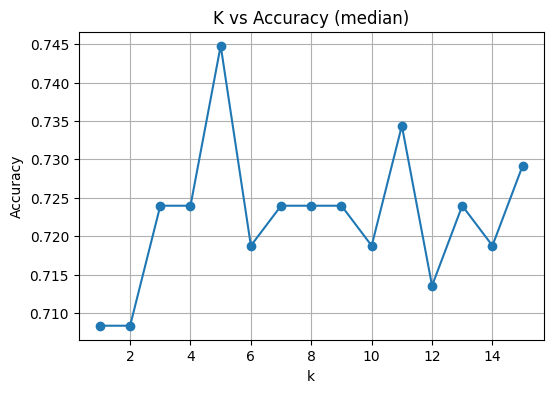

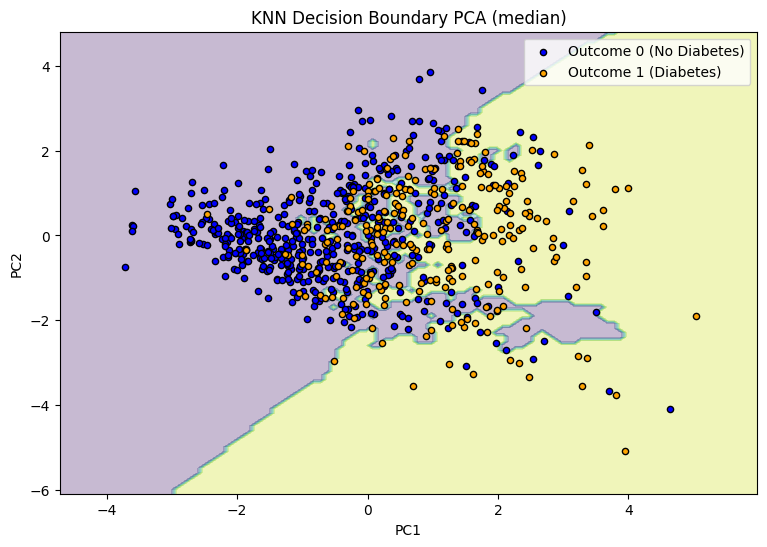


==== MODE IMPUTATION ====
Best K: 5
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[106  19]
 [ 27  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       125
           1       0.68      0.60      0.63        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.76       192



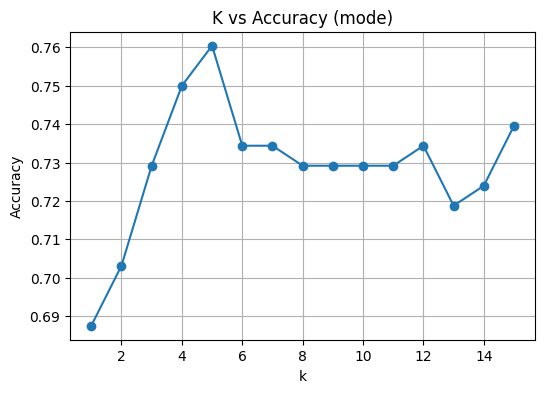

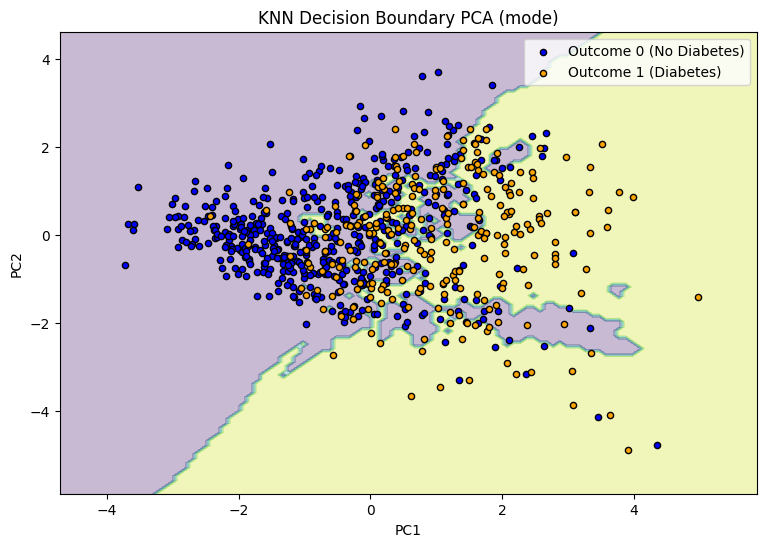


Task Completed Successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

url="https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df=pd.read_csv(url)
print("Shape:",df.shape)
print(df.head())

print("\nMissing values:\n",df.isnull().sum())
print("\nData types:\n",df.dtypes)
print("\nStatistics:\n",df.describe())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(x='Outcome',data=df)
plt.title("Target Distribution")
plt.show()

df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

numeric_cols=df.columns

def impute_dataset(strategy):
    new_df=df.copy()
    # Replace 0s with NaN in relevant columns as they often represent missing data
    cols_to_impute_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in cols_to_impute_zeros:
        new_df[col] = new_df[col].replace(0, np.nan)

    for col in numeric_cols:
        if strategy=="mean": new_df[col] = new_df[col].fillna(new_df[col].mean())
        elif strategy=="median": new_df[col] = new_df[col].fillna(new_df[col].median())
        elif strategy=="mode": new_df[col] = new_df[col].fillna(new_df[col].mode()[0])
    return new_df

datasets={"mean":impute_dataset("mean"),"median":impute_dataset("median"),"mode":impute_dataset("mode")}

def train_knn(data,strategy):
    print(f"\n==== {strategy.upper()} IMPUTATION ====")
    X=data.drop('Outcome',axis=1)
    y=data['Outcome']
    scaler=StandardScaler()
    X_scaled=scaler.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42,stratify=y)
    ks=range(1,16)
    accs=[]
    for k in ks:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        accs.append(knn.score(X_test,y_test))
    best_k=ks[np.argmax(accs)]
    print("Best K:",best_k)
    final_knn=KNeighborsClassifier(n_neighbors=best_k)
    final_knn.fit(X_train,y_train)
    y_pred=final_knn.predict(X_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))
    plt.figure(figsize=(6,4))
    plt.plot(ks,accs,marker='o')
    plt.title(f"K vs Accuracy ({strategy})")
    plt.xlabel("k");plt.ylabel("Accuracy");plt.grid(True)
    plt.show()
    pca=PCA(n_components=2)
    X2=pca.fit_transform(X_scaled)
    X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.25,random_state=42,stratify=y)
    knn2=KNeighborsClassifier(n_neighbors=best_k)
    knn2.fit(X2_train,y2_train)
    x_min,x_max=X2[:,0].min()-1,X2[:,0].max()+1
    y_min,y_max=X2[:,1].min()-1,X2[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    Z=knn2.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(9,6))
    plt.contourf(xx,yy,Z,alpha=0.3)
    # Plot points for Outcome 0 and Outcome 1 separately to add labels for the legend
    plt.scatter(X2[y==0,0], X2[y==0,1], c='blue', s=20, edgecolor='k', label='Outcome 0 (No Diabetes)')
    plt.scatter(X2[y==1,0], X2[y==1,1], c='orange', s=20, edgecolor='k', label='Outcome 1 (Diabetes)')
    plt.title(f"KNN Decision Boundary PCA ({strategy})")
    plt.xlabel("PC1");plt.ylabel("PC2")
    plt.legend()
    plt.show()

for method in ["mean","median","mode"]:
    train_knn(datasets[method],method)

print("\nTask Completed Successfully!")